<a href="https://colab.research.google.com/github/nakamura196/ndl_ocr/blob/main/Gradio%E3%81%AEAPI%E3%82%92%E7%94%A8%E3%81%84%E3%81%9F%E7%89%A9%E4%BD%93%E6%A4%9C%E5%87%BA%E4%BE%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GradioのAPIを用いた物体検出例

## 関数

In [6]:
import base64
from urllib import request
from IPython.display import Image, display_jpeg
import PIL.Image

def image_to_data_url(filename):
    ext = filename.split('.')[-1]
    prefix = f'data:image/{ext};base64,'
    with open(filename, 'rb') as f:
        img = f.read()
    return prefix + base64.b64encode(img).decode('utf-8')

def convertUrl2Base64(url, local=False):
    if local:
        path = url
    else:
        path = url.split("/")[-1].replace(".bmp", ".jpg")
        request.urlretrieve(url, path)

    d = image_to_data_url(path)

    return d, PIL.Image.open(path)

## 実行

例として、『源氏物語』（京都大学所蔵）を使用しています。

検出した物体の数 14
name 1_overall confidence 0.975472331


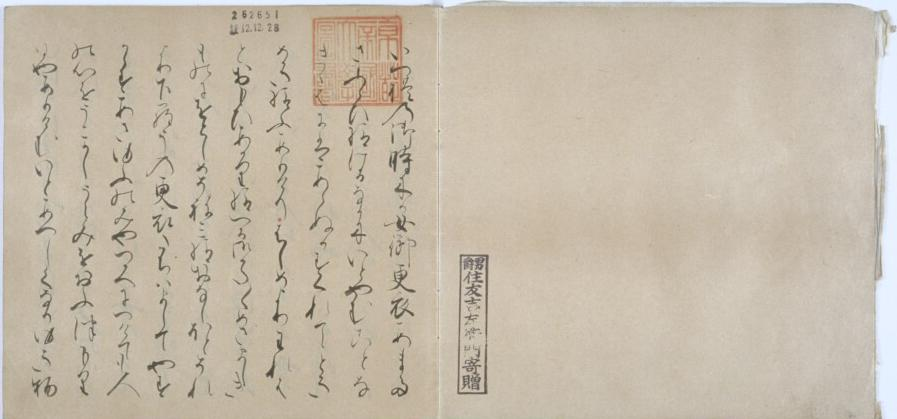

name 5_stamp confidence 0.9179674983


name 2_handwritten confidence 0.9177722931


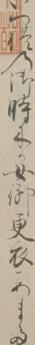

name 5_stamp confidence 0.9162486196


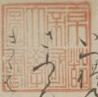

name 2_handwritten confidence 0.9143485427


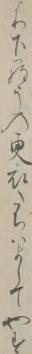

name 2_handwritten confidence 0.9141690731


name 2_handwritten confidence 0.9138120413


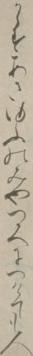

name 2_handwritten confidence 0.9116671681


name 2_handwritten confidence 0.9093984365


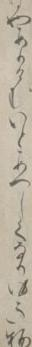

name 2_handwritten confidence 0.9042386413


name 2_handwritten confidence 0.9020283818


name 2_handwritten confidence 0.8685811758


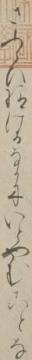

name 2_handwritten confidence 0.8561544418


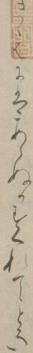

name 2_handwritten confidence 0.4160892665


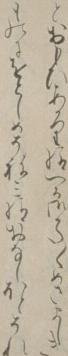

In [7]:
# 変数
url = "https://rmda.kulib.kyoto-u.ac.jp/iiif/RB00007030/01/RB00007030_00003_0.ptif/full/1024,/0/default.jpg"
endpoint = "https://hf.space/embed/nakamura196/yolov5-ndl-layout/+/api/predict"

# メイン

import requests
from IPython.display import display, HTML

def predict(url, endpoint):
  d, img = convertUrl2Base64(url)
  r = requests.post(url=endpoint, json={"data": [d]})
  res = r.json()["data"][1]
  return res, img

def getRatio(img):

  w, h = img.size

  long_side = max(w, h)

  ratio = long_side / 1024

  return ratio

res, img = predict(url, endpoint)
ratio = getRatio(img)

print("検出した物体の数", len(res))

for item in res:
    xmin = int(item["xmin"] * ratio)
    ymin = int(item["ymin"] * ratio)
    xmax = int(item["xmax"] * ratio)
    ymax = int(item["ymax"] * ratio)
    im_crop = img.crop((xmin, ymin, xmax, ymax))
    im_crop.save('tmp.jpg')

    print("name", item["name"], "confidence", item["confidence"])
    display_jpeg(Image("tmp.jpg"))